In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')
import plotly
plotly.tools.set_credentials_file(username='liansin', api_key='zOAnrsxV8Aa1vMocL111')

In [2]:
df = pd.read_csv(r'Ntu_Orders.csv')

In [3]:
df.head()

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,UnitPrice,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,399.0,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,350.0,-34.0,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,540.0,-57.0,0.0,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,445.0,-44.0,0.0,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False


In [4]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
data = df.groupby(by='new_DateId')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True)
data.head(10)

,new_DateId,Quantity
0,2017-01-01,3823
1,2017-01-02,5105
2,2017-01-03,3623
3,2017-01-04,2889
4,2017-01-05,2843
5,2017-01-06,2391
6,2017-01-07,2641
7,2017-01-08,2335
8,2017-01-09,2119
9,2017-01-10,2470


In [5]:
fig,ax = plt.subplots()
ax.plot(data['new_DateId'], data['Quantity'])

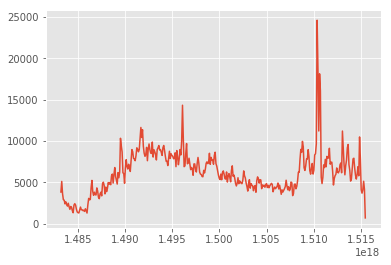

In [6]:
plt.show()

In [7]:
import datetime
# 在處理資料量大時速度較  dt.dayofweek  慢
#data['weekday'] = data['new_DateId'].apply(lambda x: x.weekday())
#data.head(100)

In [8]:
data['weekday'] = data['new_DateId'].dt.dayofweek
data.head(10)

,new_DateId,Quantity,weekday
0,2017-01-01,3823,6
1,2017-01-02,5105,0
2,2017-01-03,3623,1
3,2017-01-04,2889,2
4,2017-01-05,2843,3
5,2017-01-06,2391,4
6,2017-01-07,2641,5
7,2017-01-08,2335,6
8,2017-01-09,2119,0
9,2017-01-10,2470,1


In [9]:
for i in range(len(data.weekday)):
    if data.weekday[i] ==1:
        print(i,data.weekday[i])

2 1
9 1
16 1
23 1
30 1
37 1
44 1
51 1
58 1
65 1
72 1
79 1
86 1
93 1
100 1
107 1
114 1
121 1
128 1
135 1
142 1
149 1
156 1
163 1
170 1
177 1
184 1
191 1
198 1
205 1
212 1
219 1
226 1
233 1
240 1
247 1
254 1
261 1
268 1
275 1
282 1
289 1
296 1
303 1
310 1
317 1
324 1
331 1
338 1
345 1
352 1
359 1
366 1
373 1


In [10]:
data.weekday = data.weekday+1

In [11]:
data['weekday'] = data.weekday
data.head(10)

,new_DateId,Quantity,weekday
0,2017-01-01,3823,7
1,2017-01-02,5105,1
2,2017-01-03,3623,2
3,2017-01-04,2889,3
4,2017-01-05,2843,4
5,2017-01-06,2391,5
6,2017-01-07,2641,6
7,2017-01-08,2335,7
8,2017-01-09,2119,1
9,2017-01-10,2470,2


In [12]:
abc = []
for i in range(1,8):
    gg = data['Quantity'][data['weekday']==i].sum()
    abc.append(gg)
print(abc)

[316103, 362231, 350033, 309163, 293325, 331869, 352318]


In [13]:
np.mean(abc),np.std(abc), np.mean(abc)+np.std(abc),np.mean(abc)-np.std(abc)

(330720.28571428574, 23635.553900936648, 354355.8396152224, 307084.73181334906)

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

sale = [go.Bar(
            x=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],
            y=abc
    )]
py.iplot(sale, filename='basic-bar')

 - 可看出星期幾 與 銷售量沒太大的關係

In [15]:
ad = df['SalesOrderSlaveDateTime'][0][0:10]

In [16]:
sd = df['SalesOrderSlaveDateTime'][0][11:19]
sd

'23:11:47'

In [17]:
df['SalesOrderSlaveDateTime'][0]

'2017-01-03 23:11:47.207'

In [18]:
#使用任意畫圖包畫出 星期幾 v.s 銷售量 的 bar chart。

In [19]:
from datetime import datetime
datetime_object = datetime.strptime('2017-01-03 23:11:47.11', '%Y-%m-%d %H:%M:%S.%f')

In [20]:
datetime_object == ad

False

In [21]:
df['weekday'] = df['new_DateId'].dt.dayofweek+1

In [22]:
df.head(5)

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId,weekday
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03,2
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03,2
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,0.0,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False,2017-01-01,7
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,0.0,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False,2017-01-01,7
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,0.0,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False,2017-01-02,1


In [23]:
hh = []

In [24]:
for i in range(len(df)):   
    t1 = datetime.strptime(df['SalesOrderSlaveDateTime'][i][11:19], '%H:%M:%S')
    qwe = ("%s:%s:%s" % (t1.hour, t1.minute, t1.second))
    hh.append(qwe)

In [25]:
hh

['23:11:47',
 '23:11:47',
 '17:21:32',
 '21:41:58',
 '15:37:33',
 '12:56:21',
 '8:31:0',
 '13:58:47',
 '14:51:30',
 '23:11:47',
 '23:11:47',
 '0:50:55',
 '11:38:40',
 '1:43:57',
 '14:7:20',
 '19:58:50',
 '11:34:9',
 '11:34:9',
 '21:9:55',
 '23:14:40',
 '23:4:23',
 '21:39:29',
 '21:39:29',
 '22:24:48',
 '22:24:48',
 '22:25:43',
 '12:35:47',
 '13:3:29',
 '14:10:36',
 '14:39:1',
 '14:43:25',
 '15:12:8',
 '15:26:52',
 '23:33:15',
 '23:43:41',
 '0:21:11',
 '18:9:22',
 '0:36:25',
 '19:1:54',
 '19:7:31',
 '19:42:45',
 '1:17:6',
 '20:23:7',
 '3:56:37',
 '7:5:38',
 '11:34:50',
 '23:7:17',
 '23:10:47',
 '10:20:28',
 '23:56:49',
 '0:3:13',
 '10:20:28',
 '0:3:13',
 '10:20:28',
 '0:3:13',
 '0:3:13',
 '0:36:30',
 '0:54:55',
 '23:39:24',
 '2:2:32',
 '11:13:58',
 '2:2:32',
 '11:13:58',
 '3:57:47',
 '10:20:28',
 '13:40:13',
 '15:13:52',
 '10:38:57',
 '22:39:41',
 '22:39:41',
 '11:34:50',
 '11:34:50',
 '6:29:9',
 '12:3:20',
 '16:37:33',
 '16:40:0',
 '22:39:41',
 '12:58:6',
 '12:58:6',
 '8:52:23',
 '19:3

In [26]:
#datetime.strptime(df['SalesOrderSlaveDateTime'][1][11:19], format = '%H:%M:%S')

TypeError: strptime() takes no keyword arguments

In [ ]:
#df['SalesOrderSlaveDateTime'][1][11:19].strptime("%H:%M:%S")

In [ ]:
#datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

In [27]:
df['order_time'] = hh
df.head(10)

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId,weekday,order_time
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03,2,23:11:47
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03,2,23:11:47
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False,2017-01-01,7,17:21:32
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False,2017-01-01,7,21:41:58
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False,2017-01-02,1,15:37:33
5,26881155,20170103,2ED6E54C-A7B0-447F-B3C7-8B0CA4536E54,26938659,1317,9897,b'\x9a\xee\xee\xb30pf8d\x0bp\x8b\xaa\xde\xa8\x...,Web,Brand,Mobile,...,156.0,2017-01-03 12:56:21.980,Finish,Family,Family,NaN,False,2017-01-03,2,12:56:21
6,26928963,20170104,6B11D879-C56E-4057-A6A0-45C30732F542,26986470,1317,10029,"b'\x9e\xc5{\xe4\xfd_\xa9XP\x19*\xc4\x9c""\x0b%\...",Web,Brand,Mobile,...,223.0,2017-01-04 08:31:00.313,Finish,Family,Family,NaN,False,2017-01-04,3,8:31:0
7,26942457,20170104,249FEB46-134C-4DE3-902D-73D289D130DB,26999964,1317,10029,b'\xf7\xca\xed\xd5\xaf{\xfem\xa4\x88\x16)0\x88...,Web,Brand,Mobile,...,236.0,2017-01-04 13:58:47.880,Finish,Family,Family,NaN,False,2017-01-04,3,13:58:47
8,26945149,20170104,54B80CB7-78BA-49D7-9850-0A61A9B67E03,27002656,1317,8823,"b'\t\x90\xf9\xe6sc\x9d\xe3%eZ,C$\x8f{~\xe6`\xa8'",Web,Brand,Mobile,...,225.0,2017-01-04 14:51:30.517,Finish,Family,Family,NaN,False,2017-01-04,3,14:51:30
9,26914458,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971962,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03,2,23:11:47


In [28]:
df.sort_values(by=['weekday'])

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId,weekday,order_time
437815,50342364,20171225,8A822C74-CCBC-4892-AE62-DD4907712053,50406184,1317,16270,b'\xe8\xe0\x87\xe9\x06\xf7\x84l\xc4\x15x\xa5\x...,Web,Brand,Mobile,...,390.0,2017-12-25 09:43:16.513,WaitingToShipping,Family,Family,NaN,False,2017-12-25,1,9:43:16
1262837,32811156,20170410,55359AB8-34C2-4E3B-8C99-D9CB94A5A090,32869890,1317,4707,b'\tr\x18\xb0c[^a\x10\xcd\xc4\x9d\xb1dt^\xf6+Y...,Web,Brand,PC,...,226.0,2017-04-10 16:12:59.093,Finish,CreditCardOnce,Home,NaN,False,2017-04-10,1,16:12:59
1262833,32312186,20170403,B0F7AFA9-7E79-4E0B-8225-8E6F73575C87,32370824,1317,11083,b'\xb8\x8cz\x11R\xf5\xe3}P}7\x04;r\xa9\xc0sQ\x...,Web,Brand,Mobile,...,199.0,2017-04-03 12:01:53.547,Finish,SevenEleven,SevenEleven,NaN,False,2017-04-03,1,12:1:53
1262832,32305928,20170403,C6EDF6D4-75C2-4730-BBA6-FAAA82A732E5,32364566,1317,11225,b'\x8d\x8cA\x9c\x8fd\xe0\xc5\x80\x8fU>\x01l!>\...,Web,Brand,Mobile,...,199.0,2017-04-03 09:59:01.913,Finish,SevenEleven,SevenEleven,NaN,False,2017-04-03,1,9:59:1
1816929,36794771,20170605,E3C4207B-358C-493B-9F19-9C9CE4E53981,36855350,1317,5377,b'\xf4C\\\xa8!t\x07\x0f&\xa2\xafy\x91C\xcc5a\x...,iOSApp,Brand,Mobile,...,199.0,2017-06-05 12:37:44.763,Finish,SevenEleven,SevenEleven,NaN,False,2017-06-05,1,12:37:44
1816934,37249592,20170612,12FDA786-9B6F-449E-89E7-A038C922CBFB,37310314,1317,12904,b'\x12T\xcb\xa5\xf5\xf0;\xd6\x1dp\xa4\x84t\xb5...,iOSApp,Brand,Mobile,...,199.0,2017-06-12 00:28:12.490,Finish,SevenEleven,SevenEleven,NaN,False,2017-06-12,1,0:28:12
1816939,36824862,20170605,E8983548-59A6-4EF4-9FB7-4FB44893D77A,36885438,1317,7409,b'(r \x92\xf8\x10\xc7\x16\xe6\x15\xaa\xc9L5~g\...,Web,Brand,PC,...,199.0,2017-06-05 21:39:24.250,Finish,SevenEleven,SevenEleven,NaN,False,2017-06-05,1,21:39:24
1816940,36834475,20170605,AD89E7E3-27F5-4D8B-9EB6-8F0A54F7B8E4,36895051,1317,10469,b'\xfb\xc6E\x00\xba\xd7ay\xfd\xbd\xdd=J:xk\xc7...,Web,Brand,PC,...,199.0,2017-06-05 23:35:35.533,Finish,SevenEleven,SevenEleven,NaN,False,2017-06-05,1,23:35:35
1262799,32830513,20170410,7E009389-CC09-4883-A628-E91BBB86D1FC,32889248,1317,5332,b'\xfe8\xea\xd0/\xeeY\xbf\x93b\x82\x1c\xc5\xee...,Web,Brand,Mobile,...,314.0,2017-04-10 21:57:57.610,Finish,SevenEleven,SevenEleven,NaN,False,2017-04-10,1,21:57:57
1262838,32811158,20170410,55359AB8-34C2-4E3B-8C99-D9CB94A5A090,32869892,1317,11028,b'\tr\x18\xb0c[^a\x10\xcd\xc4\x9d\xb1dt^\xf6+Y...,Web,Brand,PC,...,176.0,2017-04-10 16:12:59.123,Finish,CreditCardOnce,Home,NaN,False,2017-04-10,1,16:12:59


In [29]:
oo=[]
oo.append(0)

In [30]:
atr = df['weekday'].tolist()
for j in range(1,8):   
    rr = atr.count(j)
    oo.append(rr)
    rr = 0

In [31]:
oo

[0, 309587, 353659, 343118, 302947, 287544, 325587, 345906]

In [32]:
fg = []
hijk = 0
fg.append(hijk)
for j in range(1,8):
    hijk = hijk+oo[j]
    fg.append(hijk)

In [33]:
fg

[0, 309587, 663246, 1006364, 1309311, 1596855, 1922442, 2268348]

In [34]:
a1=a2=a3=a4=0
qq = []

In [35]:
for i in range(1,len(fg)):
    for j in range(fg[i-1],fg[i]):
        if ('24:00') > df['order_time'][j] > ('18:00'):
            a4 = a4+1
        elif ('18:00') > df['order_time'][j] > ('12:00'):
            a3 = a3+1
        elif ('6:00') > df['order_time'][j] > ('0:00'):
            a1 = a1+1
        else:
            a2 = a2+1
    qq.append(a1)
    qq.append(a2)
    qq.append(a3)
    qq.append(a4)
    print(a1,a2,a3,a4)
    a1=a2=a3=a4=0

66270 28596 87329 127392
76510 32910 100319 143920
75031 31525 98481 138081
65619 26473 86071 124784
61218 27550 80305 118471
70418 30947 90804 133418
75599 31647 98314 140346


 - 禮拜一~禮拜日各時段的訂單量

In [42]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],
    y=[qq[0], qq[4], qq[8], qq[12], qq[16], qq[20], qq[24]],
    name='00:00~06:00'
)
trace2 = go.Bar(
    x=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],
    y=[qq[1], qq[5], qq[9], qq[13], qq[17], qq[21], qq[25]],
    name='06:00~12:00'
)
trace3 = go.Bar(
    x=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],
    y=[qq[2], qq[6], qq[10], qq[14], qq[18], qq[22], qq[26]],
    name='12:00~18:00'
)
trace4 = go.Bar(
    x=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],
    y=[qq[3], qq[7], qq[11], qq[15], qq[19], qq[23], qq[27]],
    name='18:00~00:00'
)

data_value = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data_value, layout=layout)
py.iplot(fig, filename='stacked-bar')

 - 可以看出大部分的人都在下午至晚上進行交易，若是要提高銷貨量可針對這兩個時段來進行廣告推銷(與星期幾無關)